### **Összes rendelés száma, legkorábbi és legkésőbbi rendelés dátuma**

In [4]:
SELECT 
    COUNT(*) AS 'Összes rendelés száma', 
    MIN(REND_DATUM) AS 'Legkorábbi rendelés dátuma', 
    MAX(REND_DATUM) AS 'Legkésőbbi rendelés dátuma'
FROM RENDELES

(1 row affected)

Total execution time: 00:00:00.044

Összes rendelés száma,Legkorábbi rendelés dátuma,Legkésőbbi rendelés dátuma
28085,2015-05-01,2017-04-01


### **Rendelések száma havi lebontásban**

In [7]:
SELECT 
    YEAR(REND_DATUM) AS 'Rendelés éve',
    MONTH(REND_DATUM) AS 'Rendelés hónapja',
    COUNT(*) AS 'Rendelések száma'
FROM RENDELES
GROUP BY YEAR(REND_DATUM), MONTH(REND_DATUM)
ORDER BY 1, 2

(24 rows affected)

Total execution time: 00:00:00.037

Rendelés éve,Rendelés hónapja,Rendelések száma
2015,5,1203
2015,6,1155
2015,7,1235
2015,8,1276
2015,9,1207
2015,10,1233
2015,11,1178
2015,12,1260
2016,1,1226
2016,2,1193


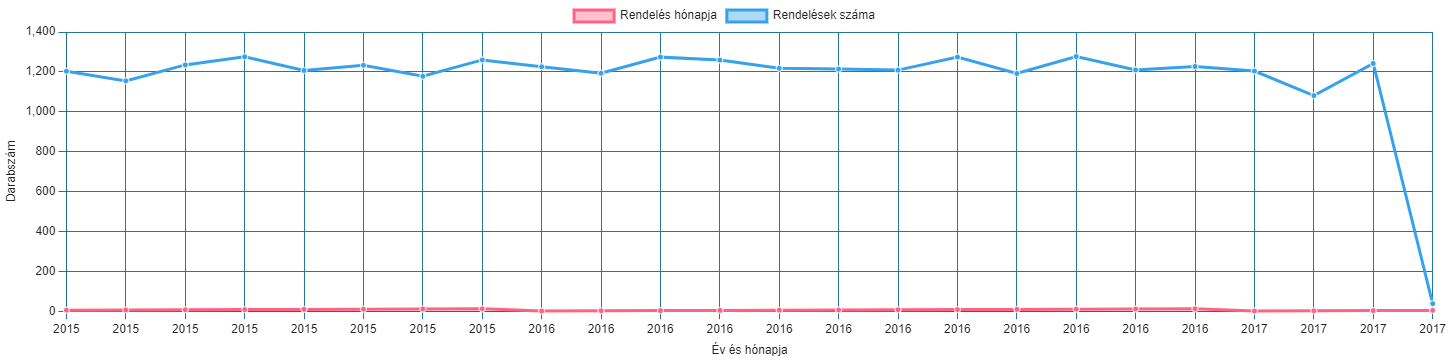

### **Leggyakoribb szállítási módok százalékos eloszlása**

In [10]:
SELECT 
    SZALL_MOD AS 'Szállítási mód', 
    COUNT(*) AS 'Szállítások száma', 
    CAST(ROUND((COUNT(*) * 100.0 / (SELECT COUNT(*) FROM RENDELES)), 2) as float) AS 'Százalék'
FROM RENDELES
GROUP BY SZALL_MOD
ORDER BY 2 DESC

(3 rows affected)

Total execution time: 00:00:00.044

Szállítási mód,Szállítások száma,Százalék
Személyes átvétel,9468,"33,71"
GLS,9426,"33,56"
Posta,9191,"32,73"


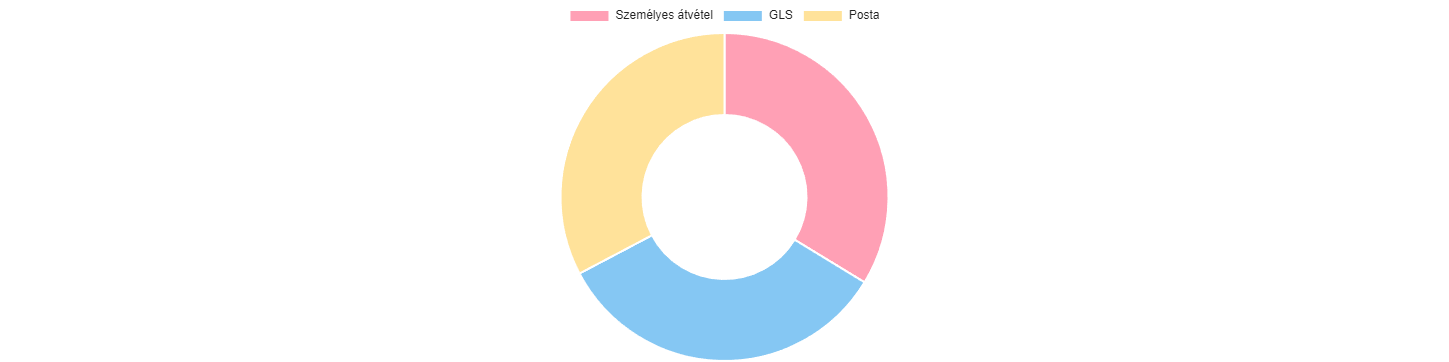

### **Leggyorsabb szállítási idő, leghosszabb szállítási idő, átlagos szállítási idő, szállítási idők szórása**

In [14]:
SELECT 
    MIN(DATEDIFF(DAY, REND_DATUM, SZALL_DATUM)) AS 'Leggyorsabb szállítási idő (nap)',
    MAX(DATEDIFF(DAY, REND_DATUM, SZALL_DATUM)) AS 'Leghosszabb szállítási idő (nap)',
    AVG(DATEDIFF(DAY, REND_DATUM, SZALL_DATUM)) AS 'Átlagos szállítási idő (nap)',
    CAST(ROUND(STDEV(DATEDIFF(DAY, REND_DATUM, SZALL_DATUM)), 2) as float) AS 'Szállítási idők szórása'
FROM RENDELES
WHERE SZALL_DATUM IS NOT NULL

(1 row affected)

Total execution time: 00:00:00.043

Leggyorsabb szállítási idő (nap),Leghosszabb szállítási idő (nap),Átlagos szállítási idő (nap),Szállítási idők szórása
2,10,5,"2,6"


### **Számlázási címek eloszlása**

In [18]:
SELECT 
    SZAMLA_CIM AS 'Számlázási cím', COUNT(*) AS 'Rendelések száma'
FROM RENDELES
WHERE SZAMLA_CIM IS NOT NULL
GROUP BY SZAMLA_CIM
ORDER BY 2 ASC

(273 rows affected)

Total execution time: 00:00:00.050

Számlázási cím,Rendelések száma
"1035 Budapest, Nagy u.14.",1
"1047 Budapest, Fő u. 2.",1
"1047 Budapest, Kiss u. 32.",1
"1047 Budapest, Nagy u.14.",1
"1067 Budapest, Kiss u. 32.",1
"1067 Budapest, Nagy u.14.",1
"1084 Budapest, Nagy u.14.",1
"1124 Budapest, Fő u. 2.",1
"1124 Budapest, Kiss u. 32.",1
"1155 Budapest, Nagy u.14.",1
